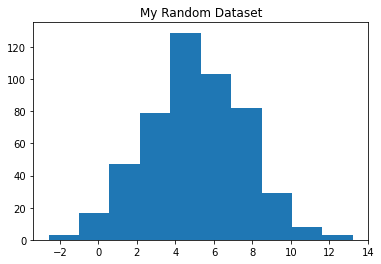

My data looks symmetrical, its mean median and mod looks same.


In [40]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

distribution = np.random.normal(5, 2.5, 500)
plt.hist(distribution)
plt.title('My Random Dataset')
plt.show()

print('My data looks symmetrical, its mean median and mod looks same.')


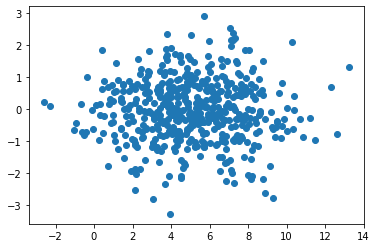

In [41]:
std_normal = np.random.normal(0, 1, 500)
distribution.sort()
plt.scatter(distribution, std_normal)

In [42]:
import yfinance as yf
import datetime
from scipy import stats

stock = 'TUPRS.IS'
start= datetime.datetime(2015,1,1)
end= datetime.datetime(2017,1,1)

tupras = yf.download(stock, start=start, end=end, interval='1d')

[*********************100%***********************]  1 of 1 completed


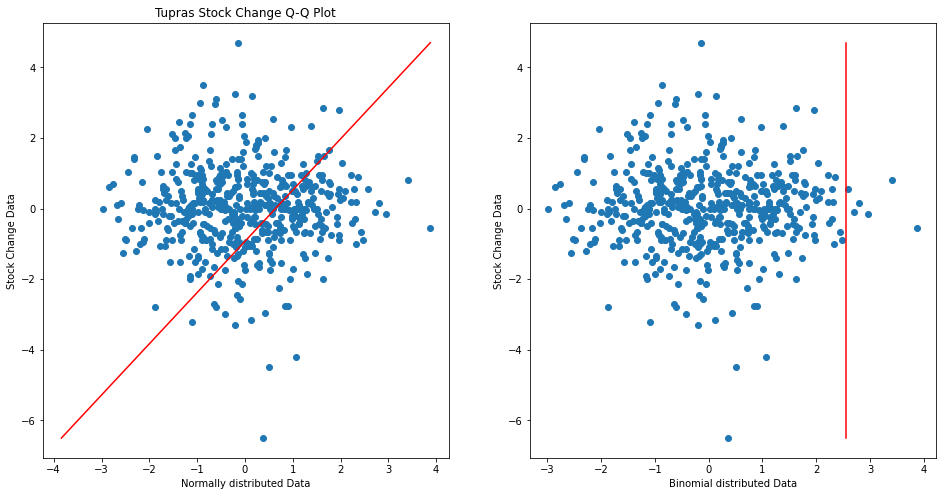

According to Q-Q plot stock change is not distributed normal or binomial. It does not fit a distribution. 


In [80]:
#Adding a column with a difference of Closing values.
tupras['Stock Change'] = tupras['Close'] - tupras['Close'].shift(1)

#Creating a standard normal distribution
std_normal = np.random.normal(np.mean(tupras['Stock Change']), np.std(tupras['Stock Change']), len(tupras))

#Sorting all values
tupras['Stock Change'].sort_values()
std_normal.sort()

#Drawing the plot and scatter
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.scatter(std_normal, tupras['Stock Change'])
plt.plot([np.min(std_normal), np.max(std_normal)],
         [np.min( tupras['Stock Change']), np.max( tupras['Stock Change'])], c='red')

#Labeling axis and plot title
plt.xlabel('Normally distributed Data')
plt.ylabel('Stock Change Data')
plt.title('Tupras Stock Change Q-Q Plot')

plt.subplot(122)
std_uniform = np.random.uniform(np.min( tupras['Stock Change']), np.max( tupras['Stock Change']))
plt.scatter(std_normal, tupras['Stock Change'])
plt.plot([np.min(std_uniform), np.max(std_uniform)],
         [np.min( tupras['Stock Change']), np.max( tupras['Stock Change'])], c='red')
plt.xlabel('Binomial distributed Data')
plt.ylabel('Stock Change Data')
plt.show()



#Comments on distribution
print('According to Q-Q plot stock change is not distributed normal or binomial. It does not fit a distribution. ')